In [1]:
import numpy as np
from skimage import data, io, filters, img_as_float
#from skimage.io import imread
#import pylab
#import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
parrots = io.imread('parrots.jpg')
parrots.shape

(474, 713, 3)

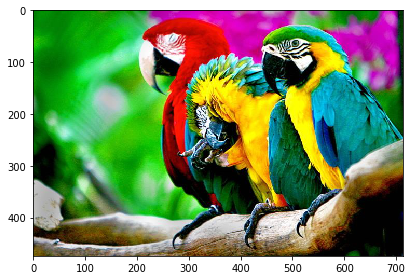

In [53]:
io.imshow(parrots)
io.show()
#pylab.imshow(camera) # for show pic right here

In [110]:
n_clast = 15
par_conv_1 = img_as_float(parrots)
par_conv_2 = par_conv_1.reshape(len(par_conv_1[1,:,:])*len(par_conv_1[:,1,:]),3)
kmeans_0 = KMeans(init='k-means++',n_clusters=n_clast, random_state=241)
kmeans_0.fit(par_conv_2)
clast_ind = kmeans_0.labels_ # index_clasters

mean_pic = np.copy(par_conv_2)
median_pic = np.copy(par_conv_2)

for i in np.arange(len(np.unique(clast_ind))):
    one_clast_0 = par_conv_2[np.where(clast_ind == i)] # select one claster
    #mean_pic.append(pd.DataFrame(data=one_clast_0).mean().values) # select claster + mean + convert + append
    mean_pic[np.where(clast_ind == i)] = pd.DataFrame(data=one_clast_0).mean().values
    median_pic[np.where(clast_ind == i)] = pd.DataFrame(data=one_clast_0).median().values

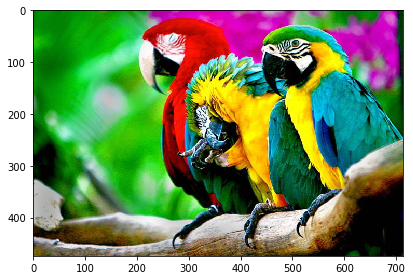

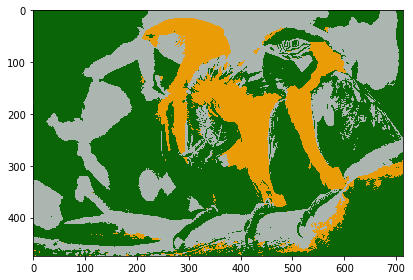

13.153487044607246


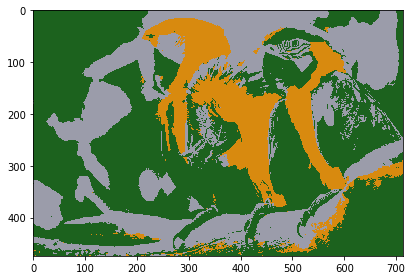

12.774948175099809


In [109]:
# calculate PSNR
I = np.copy(par_conv_2) # origin
K_mn = np.copy(mean_pic) # compressed
K_md = np.copy(median_pic) # compressed
RMSE_mn = ((1/(len(par_conv_1[1,:,:])*len(par_conv_1[:,1,:])*3))*(np.sum((I-K_mn)**2)))**(.5)
PSNR_mn = 20*np.log10(1/RMSE_mn)
RMSE_md = ((1/(len(par_conv_1[1,:,:])*len(par_conv_1[:,1,:])*3))*(np.sum((I-K_md)**2)))**(.5)
PSNR_md = 20*np.log10(1/RMSE_md)
io.imshow(par_conv_2.reshape(474, 713, 3))
io.show()
io.imshow(median_pic.reshape(474, 713, 3))
io.show()
print(PSNR_mn)
io.imshow(mean_pic.reshape(474, 713, 3))
io.show()
print(PSNR_md)

In [98]:
if (PSNR_mn or PSNR_md) > 16:
    print(n)
    print(PSNR_mn, PSNR_md)

In [102]:
# study decision:
par_conv_1 = img_as_float(parrots)
par_conv_2 = par_conv_1.reshape(len(par_conv_1[1,:,:])*len(par_conv_1[:,1,:]),3)
I = np.copy(par_conv_2) # origin

for n in np.arange(20):
    kmeans_0 = KMeans(init='k-means++',n_clusters=n+1, random_state=241)
    kmeans_0.fit(par_conv_2)
    clast_ind = kmeans_0.labels_ # index_clasters
    mean_pic = np.copy(par_conv_2)
    median_pic = np.copy(par_conv_2)

    for i in np.arange(len(np.unique(clast_ind))):
        one_clast_0 = par_conv_2[np.where(clast_ind == i)] # select one claster
        mean_pic[np.where(clast_ind == i)] = pd.DataFrame(data=one_clast_0).mean().values
        median_pic[np.where(clast_ind == i)] = pd.DataFrame(data=one_clast_0).median().values

    # calculate PSNR
    K_mn = np.copy(mean_pic) # compressed
    K_md = np.copy(median_pic) # compressed
    RMSE_mn = ((1/(len(par_conv_1[1,:,:])*len(par_conv_1[:,1,:])*3))*(np.sum((I-K_mn)**2)))**(.5)
    PSNR_mn = 20*np.log10(1/RMSE_mn)
    RMSE_md = ((1/(len(par_conv_1[1,:,:])*len(par_conv_1[:,1,:])*3))*(np.sum((I-K_md)**2)))**(.5)
    PSNR_md = 20*np.log10(1/RMSE_md)
    if (PSNR_mn or PSNR_md) > 20:
        print(n+1)
        print(PSNR_mn, PSNR_md)
        f= open("answers_14/1.txt","w+")
        f.write(str(n+1))
        f.close()
        break
        

10
20.127588746514583 19.84128407389954
